<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II

#  Trabajo semanal 1
#### Autor: Torres Alejandro
#### Legajo: 141884-1


### Circuito

<img src="./Selección_091.png" align="left" width="500" /> 



### 1. Obtener la función transferencia $\frac{V_2}{V_1}$ (módulo,fase,diagrama de polos y ceros)

In [1]:
from IPython.display import IFrame
IFrame("./trabajo_semanal1.pdf", width=1000, height=1000)


#### Simulación simbólica en SymPy.

In [2]:
import sympy as sp
from sympy.abc import s
from IPython.display import display, Math

Vi, Vo, Vx = sp.symbols("Vi, Vo, Vx")
G1, G2, Y1, Y2, R3, C1, R1, R2= sp.symbols("G1, G2, Y1, Y2, R3, C1, R1, R2")

aa = sp.solve([ 
                Vx*(Y1+Y2)-Vi*Y1, 
                Vx*(G1+G2) -Vi*G1 -Vo*G2
                ], 
                [Vi, Vo])

transf_func = aa[Vo]/aa[Vi]

tf7a = transf_func.subs(Y1, s*C1)
tf7a = tf7a.subs(Y2, 1/R3)
tf7a = tf7a.subs(G1, 1/R1)
tf7a = tf7a.subs(G2, 1/R2)

num, den = sp.fraction(sp.simplify(sp.expand(tf7a)))

num = sp.Poly(num,s)
den = sp.Poly(den,s)

k = num.LC() / den.LC()

num = num.monic()
den = den.monic()

den_coeffs = den.all_coeffs()
wo = den_coeffs[-1]

tf7a_final = sp.Mul(k,num/den, evaluate=False)

print('Tarea Semanal 1')

display(tf7a_final)
display(Math( r' \omega_o = ' + sp.latex(wo) ))


Tarea Semanal 1


1*((s - R2/(C1*R1*R3))/(s + 1/(C1*R3)))

<IPython.core.display.Math object>

In [6]:
aa = sp.solve([ 
                Vx*(Y1+Y2)-Vi*Y1, 
                Vx*(G1+G2) -Vi*G1 -Vo*G2
                ], 
                [Vi, Vo])

transf_func = aa[Vo]/aa[Vi]

transf_func


(-G1*Vx*Y2 + G2*Vx*Y1)/(G2*(Vx*Y1 + Vx*Y2))

In [7]:
tf7a = transf_func.subs(Y1, s*C1)
tf7a = tf7a.subs(Y2, 1/R3)
tf7a = tf7a.subs(G1, 1/R1)
tf7a = tf7a.subs(G2, 1/R2)

tf7a

R2*(C1*Vx*s/R2 - Vx/(R1*R3))/(C1*Vx*s + Vx/R3)

In [11]:
sp.expand(tf7a)

C1*Vx*s/(C1*Vx*s + Vx/R3) - R2*Vx/(C1*R1*R3*Vx*s + R1*Vx)

In [12]:
sp.simplify(sp.expand(tf7a))

(C1*R1*R3*s - R2)/(R1*(C1*R3*s + 1))

In [8]:
num, den = sp.fraction(sp.simplify(sp.expand(tf7a)))

In [9]:
num

C1*R1*R3*s - R2

In [10]:
den

R1*(C1*R3*s + 1)

### 2. ¿Qué tipo de filtro es?

Es un filtro rotador de fase, el modulo se mantiene constante en 0 dB para todo el espectro de frecuencia.

La Fase cambia de 0 a $\pi$, y en el valor de la fase es la mitad en el valor de $\omega$ en el polo y el cero

### 3. Transferencia normalizada.
\begin{equation}
T(s)=\frac{s-\frac{1}{C_1R_3}\frac{R_2}{R_1}}{s+\frac{1}{C_1R_3}}\\
\frac{R_2}{R_1}=1 \Rightarrow T(s)=\frac{s-\frac{1}{C_1R_3}}{s+\frac{1}{C_1R_3}}
\end{equation}


\begin{equation}
T(s)=\frac{s-\omega_0}{s+\omega_0}\\
\omega_0=\frac{1}{C_1R_3}
\end{equation}

\begin{equation}
\omega_0=1 \Rightarrow \frac{1}{C_1R_3}=1 \\
R_3=\frac{1}{C_1}
\end{equation}

La norma de transferencia la tenemos al hacer $\omega_0$=1.

Esa normalización en frecuencia implica una relación en la resistencia $R_3$ del ciruito y la inversa del valor del capacitor $C_1$. Como es restricción, la relación $\frac{R_2}{R_1}$ si es distinta de 1, mantiene un nivel constante de ganancia en el módulo de la transferencia, al tener $R_2=R_1$ podemos tomar la frecuencia de los polos y ceros como simétricas. 

### 4. Simulación en python de transferencia normalizada.

In [3]:
# Módulos para Python, algo parecido a los #include de C

# módulos numéricos y de funciones científicas
import numpy as np
from scipy import signal as sig

# PyTC2: La librería para TC2
from pytc2.sistemas_lineales import bodePlot, pzmap, GroupDelay, analyze_sys

In [4]:

import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento

plt.figure(1)
plt.close(1)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# Podés modificar el ancho y alto de los gráficos que generás
fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})


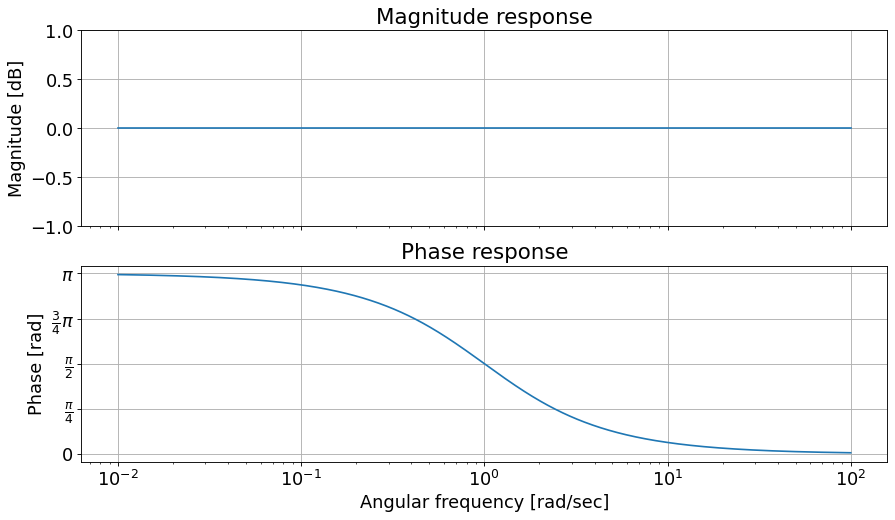

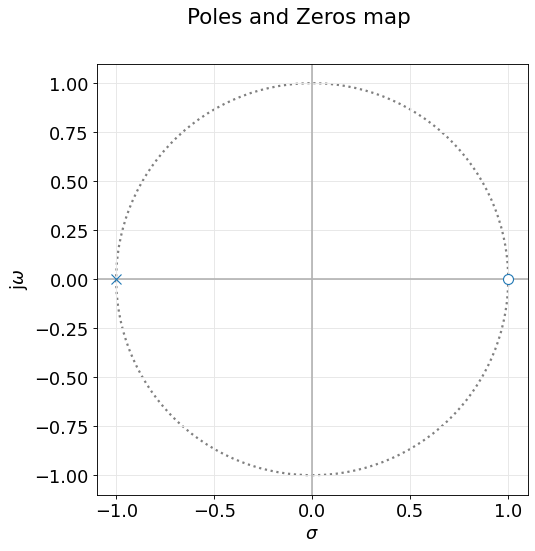

In [5]:
     
# Definimos los parámetros de la simulación

# Cargamos la funcion transferencia como vectores de sus coeficientes.

num = np.array([ 1,-1 ])
den = np.array([ 1, 1 ])

H1 = sig.TransferFunction( num, den )

# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el modulo y la fase.

_, axes_hdl = bodePlot(H1)

# para que se vea como uno intuye el módulo. Probar comentar las siguientes 2 líneas
plt.sca(axes_hdl[0])
plt.ylim([-1,1])

plt.gca

pzmap(H1)

plt.show()


### 5.Simule el circuito y obtenga la respuesta en frecuencia pedida en 1), para los valores:  R2R1=1; R3=1kΩ y C=1µF

#### Se agrega como condición un circuito, una parametrización del valor del capacitor $C_3$ para plotear la variación de la fase.

<img src="./schematic.png" align="left" width="1000" /> 
<img src="./Selección_119.png" align="left" width="1000" /> 


### 6. ¿Qué utilidad podría tener este tipo de circuitos?

Alterar la fase de una señal, en el dominio de la frecuencia implica un traslada (retraso) temporal. Se puede implementar para modificar una señal de audio, o un ecualizador.